## Dependencies

In [1]:
import os
import glob
import torch
from torch.utils.data import ConcatDataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
from src.utils import BrainTumorSegmentationDataset, BrainTumorSegmentationDataset2, plot_loss_curves
from pathlib import Path
from src.model1 import UNet
from src.model2 import UNetR2D
from src.model3 import MobileNetV3UNet
from src.train import train_UNet
from src.config.configuration import ConfigurationManager
import gc

## Global parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
H,W = 256,256
torch.manual_seed(42)
batch_size = 16
lr = 1e-3
num_epochs = 500


dataset_path_1 = Path("./data/archive/")
dataset_path_2 = Path('./data/brain_mri/kaggle_3m/')
model_path_1 = Path('./models/model1/best_model2.pt')
model_path_2 = Path('./models/model2/best_model3.pt')
model_path_3 = Path('./models/model3/best_model3.pt')
log_path_1 = Path('./logs/train_log_unet_2.csv')
log_path_2 = Path('./logs/train_log_transunet_3.csv')
log_path_3 = Path('./logs/train_log_mobilenetv3_3.csv')

## Data loading

In [2]:
# Define transforms
transform = transforms.Compose([
    transforms.Resize((H, W)),
    transforms.ToTensor()
])

dataset_1 = BrainTumorSegmentationDataset(
    image_dir=os.path.join(dataset_path_1, "images"), 
    mask_dir=os.path.join(dataset_path_1, "masks"),
    transform=transform
)
dataset_2 = BrainTumorSegmentationDataset2(root_dir=dataset_path_2, transform=transform)

full_dataset = ConcatDataset(datasets=[dataset_1,dataset_2])

# Split dataset
train_size_1 = int(0.90 * len(full_dataset))
valid_size_1 = len(full_dataset) - train_size_1

train_dataset_1, valid_dataset_1 = random_split(full_dataset, [train_size_1, valid_size_1])

train_loader_1 = DataLoader(train_dataset_1,batch_size=batch_size,shuffle=True)
valid_loader_1 = DataLoader(valid_dataset_1,batch_size=batch_size,shuffle=True)

test_dataset = BrainTumorSegmentationDataset(
    image_dir= os.path.join(dataset_path_1,'test','images'),
    mask_dir=os.path.join(dataset_path_1,'test','masks'),
    transform=transform
)

test_loader_1 = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

## Training

### Model 1

In [3]:
# model_1 = UNet()
# train_UNet(model=model_1,
#            train_loader=train_loader_1,
#            valid_loader=valid_loader_1,
#            device=device,
#            num_epochs=num_epochs,
#            lr=lr,
#            log_path=log_path_1,
#            model_path=model_path_1)

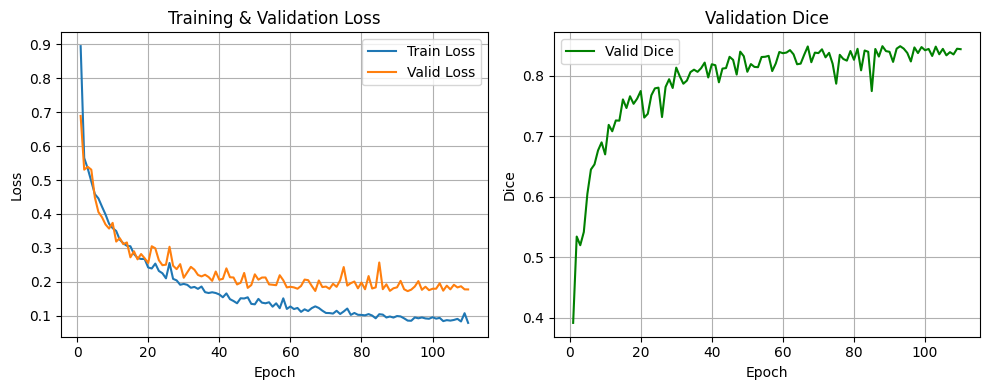

In [4]:
# del model_1
torch.cuda.empty_cache()
gc.collect()

plot_loss_curves(log_path=log_path_1)

## Model 3

c:\Projects\python\mainenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Projects\python\mainenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/500, Train Loss: 0.8812, Valid Loss: 0.5209, Valid Dice: 0.6167, Patience: 0
Epoch 2/500, Train Loss: 0.3126, Valid Loss: 0.2802, Valid Dice: 0.7673, Patience: 0
Epoch 3/500, Train Loss: 0.2357, Valid Loss: 0.2406, Valid Dice: 0.7934, Patience: 0
Epoch 4/500, Train Loss: 0.2112, Valid Loss: 0.2187, Valid Dice: 0.8157, Patience: 0
Epoch 5/500, Train Loss: 0.1976, Valid Loss: 0.2355, Valid Dice: 0.7973, Patience: 1
Epoch 6/500, Train Loss: 0.1774, Valid Loss: 0.2157, Valid Dice: 0.8111, Patience: 0
Epoch 7/500, Train Loss: 0.1718, Valid Loss: 0.2028, Valid Dice: 0.8223, Patience: 0
Epoch 8/500, Train Loss: 0.1669, Valid Loss: 0.2052, Valid Dice: 0.8206, Patience: 1
Epoch 9/500, Train Loss: 0.1644, Valid Loss: 0.1961, Valid Dice: 0.8283, Patience: 0
Epoch 10/500, Train Loss: 0.1536, Valid Loss: 0.1845, Valid Dice: 0.8394, Patience: 0
Epoch 11/500, Train Loss: 0.1434, Valid Loss: 0.2058, Valid Dice: 0.8188, Patience: 1
Epoch 12/500, Train Loss: 0.1422, Valid Loss: 0.2153, Valid Dic

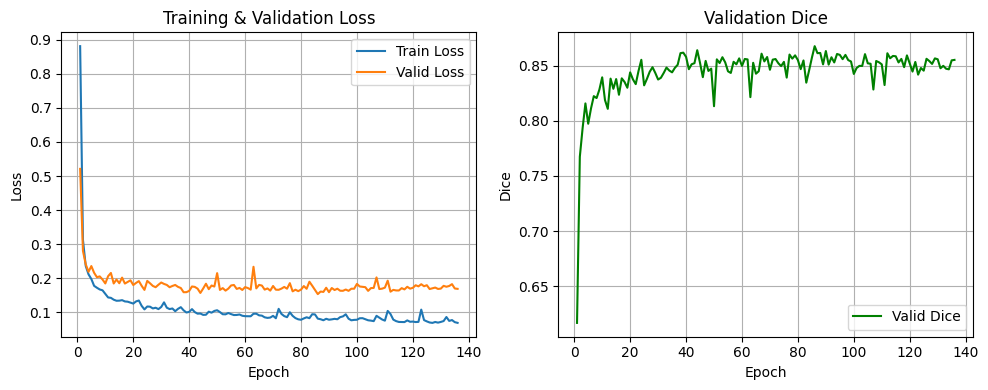

In [5]:
model_3 = MobileNetV3UNet()
train_UNet(model=model_3,
           train_loader=train_loader_1,
           valid_loader=valid_loader_1,
           device=device,
           num_epochs=num_epochs,
           lr=lr,
           log_path=log_path_3,
           model_path=model_path_3)
del model_3
torch.cuda.empty_cache()
gc.collect()

plot_loss_curves(log_path=log_path_3)

### Model 2

Epoch 1/500, Train Loss: 1.1119, Valid Loss: 0.8486, Valid Dice: 0.3917, Patience: 0
Epoch 2/500, Train Loss: 0.7128, Valid Loss: 0.6249, Valid Dice: 0.4563, Patience: 0
Epoch 3/500, Train Loss: 0.6260, Valid Loss: 0.6965, Valid Dice: 0.4021, Patience: 1
Epoch 4/500, Train Loss: 0.5985, Valid Loss: 0.6097, Valid Dice: 0.4523, Patience: 0
Epoch 5/500, Train Loss: 0.5763, Valid Loss: 0.6803, Valid Dice: 0.4256, Patience: 1
Epoch 6/500, Train Loss: 0.5515, Valid Loss: 0.5351, Valid Dice: 0.5279, Patience: 0
Epoch 7/500, Train Loss: 0.5400, Valid Loss: 0.5427, Valid Dice: 0.5157, Patience: 1
Epoch 8/500, Train Loss: 0.5247, Valid Loss: 0.5259, Valid Dice: 0.5447, Patience: 0
Epoch 9/500, Train Loss: 0.5134, Valid Loss: 0.5351, Valid Dice: 0.5214, Patience: 1
Epoch 10/500, Train Loss: 0.5029, Valid Loss: 0.4671, Valid Dice: 0.5904, Patience: 0
Epoch 11/500, Train Loss: 0.4922, Valid Loss: 0.4730, Valid Dice: 0.5823, Patience: 1
Epoch 12/500, Train Loss: 0.4965, Valid Loss: 0.4629, Valid Dic

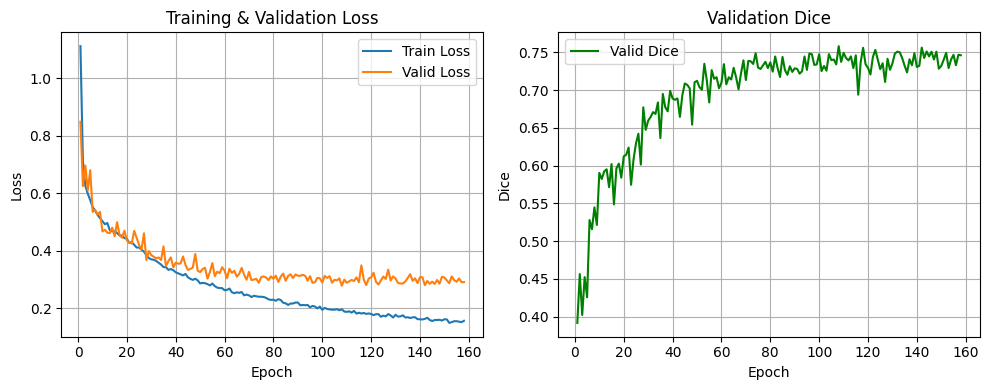

In [6]:
config_manager = ConfigurationManager()
model_params = config_manager.get_UNetR_params()
model_2 = UNetR2D(config=model_params)
train_UNet(model=model_2,
           train_loader=train_loader_1,
           valid_loader=valid_loader_1,
           device=device,
           num_epochs=num_epochs,
           lr=lr,
           log_path=log_path_2,
           model_path=model_path_2)
del model_2
torch.cuda.empty_cache()
gc.collect()

plot_loss_curves(log_path=log_path_2)